<b><font size="10">Project - <i>"Where Should I Live?"</i></font></b><a class="anchor"></a><a id="toc"></a><br>


## <font color='#0EE071'>Table of Contents</font> <a class="anchor" id='toc'></a>

- [1. Data Importation](#1)
  - [1.1 Import CSV](#1_1)
  - [1.2 Separate Columns](#1_2)
  - [1.3 Update Index](#1_3)
  - [1.4 Change Datatypes](#1_4)
- [3. Data Wrangling and Analysis](#3)
- [4. Advanced Topic - Building an Interactive Map](#4)
- [5. Data Science In Action](#5)

### <font color='#0EE071'>1. Data Importation </font> <a class="anchor" id="1"></a>
  [Back to TOC](#toc)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

#### IMPORT CSV<a class="anchor" id="1_1"></a>

In [2]:
dataframe = pd.read_csv('city_data.csv', sep = '|', skiprows=1)
dataframe.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


#### SEPARATE COLUMNS, RENAME AND ORGANIZE THEM<a class="anchor" id="1_2"></a>

In [3]:
#dataframe['City'].tolist()

In [4]:
dataframe['City'] = dataframe['City'].replace({'Greece, Athens': 'Athens, Greece'})

In [5]:
dataframe['City'] = dataframe['City'].str.replace(';', ',')
dataframe['City'] = dataframe['City'].str.replace('.', ',') 
dataframe[['City', 'Country']] = dataframe['City'].str.rsplit(',', n=1, expand=True)
dataframe['City'] = dataframe['City'].str.strip()
dataframe['Country'] = dataframe['Country'].str.strip()

In [6]:
dataframe['City'] = dataframe['City'].replace('Frankfurt am Main', 'Frankfurt') #to make it easier to read

In [7]:
#dataframe.columns

In [8]:
dataframe = dataframe.rename(columns={'Avgerage Rent Price': 'Average Rent Price',
                                      'Working Age Population ': 'Working Age Population'})

In [9]:
columns_order = ['City','Country','Population Density','Population','Working Age Population','Youth Dependency Ratio','Unemployment Rate',
                 'GDP per Capita','Days of very strong heat stress','Main Spoken Languages','Average Monthly Salary','Average Rent Price',
                 'Average Cost of Living','Average Price Groceries','Last Data Update']
df = dataframe[columns_order]

#### UPDATE INDEX<a class="anchor" id="1_3"></a>

As we want to study cities, we should define 'City' as our Index (if it is unique).

In [10]:
df['City'].duplicated().sum()

np.int64(2)

In [11]:
df[df['City'].duplicated(keep=False)]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin,Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29 00:00:00
16,Berlin,Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29 00:00:00
32,Malaga,Spain,571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27 00:00:00
33,Malaga,Spain,571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27 00:00:00


In [12]:
df = df.drop([16, 33], axis=0)

In [13]:
#df['City'].duplicated().sum()

In [14]:
df = df.set_index('City')

#### CHANGE DATATYPES<a class="anchor" id="1_4"></a>

In [15]:
df.dtypes

Country                             object
Population Density                 float64
Population                           int64
Working Age Population             float64
Youth Dependency Ratio             float64
Unemployment Rate                  float64
GDP per Capita                     float64
Days of very strong heat stress      int64
Main Spoken Languages               object
Average Monthly Salary               int64
Average Rent Price                   int64
Average Cost of Living               int64
Average Price Groceries            float64
Last Data Update                    object
dtype: object

In [16]:
numeric_cols = ['Population Density','Population','Working Age Population','Youth Dependency Ratio','Unemployment Rate','GDP per Capita',
                'Days of very strong heat stress','Average Monthly Salary','Average Rent Price','Average Cost of Living','Average Price Groceries']

In [17]:
for col in numeric_cols:
    if col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        current_dtype = df[col].dtype
        
        print(f" {col} - Min: {min_val}, Max: {max_val}, Type: {current_dtype}")

 Population Density - Min: 65.0, Max: 20983.0, Type: float64
 Population - Min: 73895, Max: 12396541, Type: int64
 Working Age Population - Min: 46359.0, Max: 8274794.0, Type: float64
 Youth Dependency Ratio - Min: 19.3, Max: 37.8, Type: float64
 Unemployment Rate - Min: 1.4, Max: 23.0, Type: float64
 GDP per Capita - Min: 10089.92, Max: 146094.0, Type: float64
 Days of very strong heat stress - Min: 0, Max: 59, Type: int64
 Average Monthly Salary - Min: 750, Max: 6636, Type: int64
 Average Rent Price - Min: 100, Max: 3190, Type: int64
 Average Cost of Living - Min: 800, Max: 4862, Type: int64
 Average Price Groceries - Min: 100.0, Max: 340.0, Type: float64


In [18]:
print('int8:[' + str(np.iinfo(np.int8).min) + ',' + str(np.iinfo(np.int8).max) + ']')
print('int16:[' + str(np.iinfo(np.int16).min) + ',' + str(np.iinfo(np.int16).max) + ']')
print('int32:[' + str(np.iinfo(np.int32).min) + ',' + str(np.iinfo(np.int32).max) + ']')
print('int64:[' + str(np.iinfo(np.int64).min) + ',' + str(np.iinfo(np.int64).max) + ']')

int8:[-128,127]
int16:[-32768,32767]
int32:[-2147483648,2147483647]
int64:[-9223372036854775808,9223372036854775807]


In [19]:
print('float16:['+str(np.finfo(np.float16).min)+','+str(np.finfo(np.float16).max)+']')
print('float32:['+str(np.finfo(np.float32).min)+','+str(np.finfo(np.float32).max)+']')
print('float64:['+str(np.finfo(np.float64).min)+','+str(np.finfo(np.float64).max)+']')

float16:[-6.55e+04,6.55e+04]
float32:[-3.4028235e+38,3.4028235e+38]
float64:[-1.7976931348623157e+308,1.7976931348623157e+308]


- CHANGE `int64` TO CORRECT INT TYPES

In [20]:
#df['Population'] = df['Population'].astype('int32')
#df['Days of very strong heat stress'] = df['Days of very strong heat stress'].astype('int8')
#df['Average Monthly Salary'] = df['Average Monthly Salary'].astype('int16')
#df['Average Rent Price'] = df['Average Rent Price'].astype('int16')
#df['Average Cost of Living'] = df['Average Cost of Living'].astype('int16')

- CHANGE `float64` TO CORRECT FLOAT TYPES

In [21]:
#df['Population Density'] = df['Population Density'].astype('float32')
#df['Working Age Population'] = df['Working Age Population'].astype('float32')
#df['Youth Dependency Ratio'] = df['Youth Dependency Ratio'].astype('float32')
#df['Unemployment Rate'] = df['Unemployment Rate'].astype('float32')
#df['GDP per Capita'] = df['GDP per Capita'].astype('float32')
#df['Average Price Groceries'] = df['Average Price Groceries'].astype('float16')

- CHANGE `object` TO `category`

In [22]:
#country = df['Country']
#print(f'There are {country.nunique()} countries in the Dataset.')
#country.unique()

In [23]:
#df['City'] = df['City'].astype('category') - City is the index, so we don´t need to change the type.
#df['Country'] = df['Country'].astype('category')

- CHANGE `Last Data Update` TO `datatime`

In [24]:
df['Last Data Update'] = pd.to_datetime(df['Last Data Update'], errors='coerce')

df.dtypes

### <font color='#0EE071'>3. Data Wrangling and Analysis </font> <a class="anchor" id="3"></a>
  [Back to TOC](#toc)

#### **1.**
---

How did you handle missing values and duplicate records in the dataset?
Justify your approach.

> Handling missing values

In [25]:
df.isnull().sum()

Country                             0
Population Density                  1
Population                          0
Working Age Population              1
Youth Dependency Ratio              0
Unemployment Rate                   1
GDP per Capita                      1
Days of very strong heat stress     0
Main Spoken Languages               1
Average Monthly Salary              0
Average Rent Price                  0
Average Cost of Living              0
Average Price Groceries            78
Last Data Update                    0
dtype: int64

In [26]:
df.drop('Average Price Groceries', axis=1, inplace=True)
#EXPLICAR O MOTIVO

- INPUT NULL IN `Population Density` 

In [27]:
df[df['Population Density'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Valencia,Spain,NaN,1748142,1162828.0,22.6,13.7,33570.0,5,Spanish;Valencian,2400,1190,1300,2023-06-04


Mean: 923.0
Median: 722.0


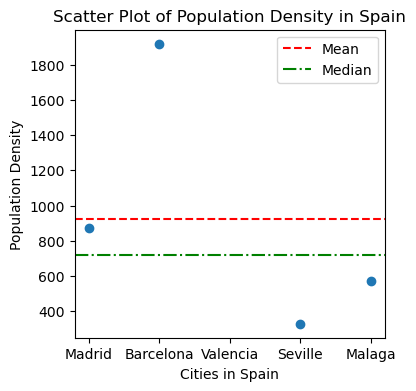

In [28]:
population_density_spain = df[df['Country'] == 'Spain']['Population Density']

mean_density = population_density_spain.mean()
median_density = population_density_spain.median()

print(f'Mean: {mean_density}')
print(f'Median: {median_density}')

x_vals = population_density_spain.index

plt.figure(figsize=(4, 4))
plt.scatter(x_vals, population_density_spain)
plt.title('Scatter Plot of Population Density in Spain')
plt.xlabel('Cities in Spain')
plt.ylabel('Population Density')
plt.axhline(y=mean_density, color='red', linestyle='--', label='Mean')
plt.axhline(y=median_density, color='green', linestyle='-.', label='Median')
plt.legend()

plt.show()

In [29]:
df.loc['Valencia', 'Population Density'] = median_density

- INPUT NULL IN `Working Age Population` 

In [30]:
df[df['Working Age Population'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Dusseldorf,Germany,1295.0,1554077,NaN,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15


Mean Age Population Ratio: 0.6521053338475745
Median Age Population Ratio: 0.6581699263597741


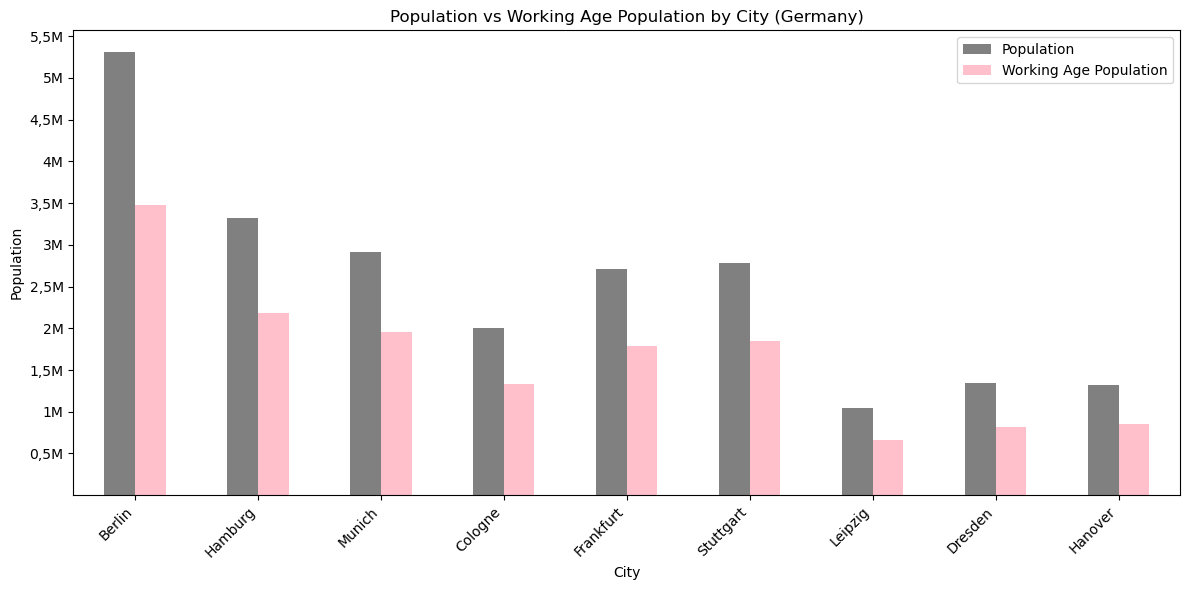

In [31]:
df_germany = df.loc[df['Country'] == 'Germany'].copy()
df_germany['Age_Pop_Ratio'] = df_germany['Working Age Population'] / df_germany['Population']
df_germany = df_germany.dropna(subset=['Age_Pop_Ratio'])

mean_ratio = df_germany['Age_Pop_Ratio'].mean()
median_ratio = df_germany['Age_Pop_Ratio'].median()
print(f"Mean Age Population Ratio: {mean_ratio}")
print(f"Median Age Population Ratio: {median_ratio}")

df_germany[['Population', 'Working Age Population']].plot.bar(figsize=(12,6),color=['gray', 'pink'])
plt.title('Population vs Working Age Population by City (Germany)')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.yticks([500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,5500000],
           ['0,5M','1M', '1,5M', '2M','2,5M','3M','3,5M','4M','4,5M','5M','5,5M'])
plt.tight_layout()

plt.show()

In [32]:
df.loc['Dusseldorf', 'Working Age Population'] = median_ratio * df.loc['Dusseldorf', 'Population']

- INPUT NULL IN `Unemployment Rate` 

In [33]:
df[df['Unemployment Rate'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Gent,Belgium,552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17


Mean: 7.5
Median: 6.2


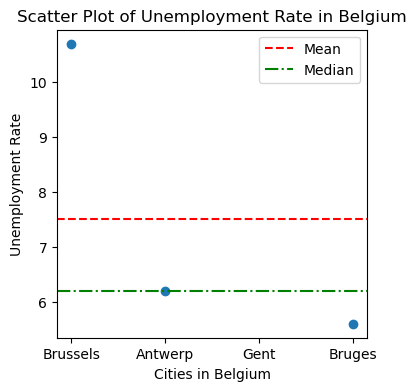

In [34]:
unemployment_rate_belgium = df[df['Country'] == 'Belgium']['Unemployment Rate']

mean_rate = unemployment_rate_belgium.mean()
median_rate = unemployment_rate_belgium.median()

print(f'Mean: {mean_rate}')
print(f'Median: {median_rate}')

x_vals = unemployment_rate_belgium.index

plt.figure(figsize=(4, 4))
plt.scatter(x_vals, unemployment_rate_belgium)
plt.title('Scatter Plot of Unemployment Rate in Belgium')
plt.xlabel('Cities in Belgium')
plt.ylabel('Unemployment Rate')
plt.axhline(y=mean_rate, color='red', linestyle='--', label='Mean')
plt.axhline(y=median_rate, color='green', linestyle='-.', label='Median')
plt.legend()

plt.show()

In [35]:
df.loc['Gent', 'Unemployment Rate'] = median_rate

- INPUT NULL IN `GDP per Capita` 

In [36]:
df[df['GDP per Capita'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Lemesos,Cyprus,190.0,262238,173906.0,23.06,11.2,NaN,0,"Greek, English, Russian",2500,1400,2300,2023-08-14


In [37]:
gdp_cyprus = df[df['Country'] == 'Cyprus']['GDP per Capita']

mean_gdp = gdp_cyprus.mean()
median_gdp = gdp_cyprus.median()

print(f'Mean: {mean_gdp}')
print(f'Median: {median_gdp}')

Mean: 34907.0
Median: 34907.0


In [38]:
df.loc['Lemesos', 'GDP per Capita'] = mean_gdp

- INPUT NULL IN `Main Spoken Languages` 

In [39]:
df[df['Main Spoken Languages'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Dusseldorf,Germany,1295.0,1554077,1.022847e+06,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15


In [40]:
df_germany_temp = df.loc[df['Country'] == 'Germany'].copy()
df_germany_temp = df_germany_temp.dropna(subset=['Main Spoken Languages'])
df_germany_temp['Languages_List'] = df_germany_temp['Main Spoken Languages'].str.split(',')
df_germany_exploded = df_germany_temp.explode('Languages_List')
df_germany_exploded['Languages_List'] = df_germany_exploded['Languages_List'].str.strip()

germany_language_counts = df_germany_exploded['Languages_List'].value_counts()
germany_languages_df = pd.DataFrame({
    'Language': germany_language_counts.index,
    'Frequence': germany_language_counts.values
})

germany_languages_df

,Language,Frequence
0,German,9
1,English,5
2,Turkish,4
3,Arabic,1


In [41]:
most_common_language = germany_language_counts.index[0]
df.loc['Dusseldorf', 'Main Spoken Languages'] = most_common_language

In [42]:
#df.isnull().sum()

> Handling Duplicates

We already handle duplicates above, droping the lines duplicated by their index with the following code:

```python
df['City'].duplicated().sum()
df[df['City'].duplicated(keep=False)] #to see both lines (not just one of each)
df = df.drop([16, 33], axis=0)

Since the duplicated entries had identical values across all columns, they were considered redundant. Removing them (df.drop([16, 33], axis=0)) prevents artificial inflation of counts for these cities/countries and ensures statistical calculations are accurate.

#### **2. a)**


---
Which country appears most frequently in the dataset? How many cities are
associated with itges?

In [43]:
country_counts = df['Country'].value_counts()
print(f"Most frequent country: {country_counts.index[0]}")
print(f"Number of cities: {country_counts.values[0]}")

Most frequent country: Germany
Number of cities: 10


#### **2. b)**


---
How many cities are present in total? How many are associated with
Greece?

In [44]:
print(f"Total number of cities in dataset: {len(df)}")
print(f"Number of cities in Greece: {len(df[df['Country'] == 'Greece'])}")

Total number of cities in dataset: 84
Number of cities in Greece: 2


#### **2. c)**


---
Which is the least spoken language in the dataset? Which are the top 3 most
spoken languages?

In [45]:
df['Main Spoken Languages List'] = df['Main Spoken Languages'].str.split(',')
df_exploded = df.explode('Main Spoken Languages List')
df_exploded['Main Spoken Languages List'] = df_exploded['Main Spoken Languages List'].str.strip()

language_counts = df_exploded['Main Spoken Languages List'].value_counts()

print(f"Language: {language_counts.index[-1]}")
print(f"Frequency: {language_counts.values[-1]} city/cities")

Language: Slovene
Frequency: 1 city/cities


In [46]:
top_3_languages = language_counts.head(3)
top_3_languages

Main Spoken Languages List
English    46
German     15
Turkish    10
Name: count, dtype: int64

#### **3. a)**


---
Entries uploaded before April 2023 need to be updated. Which cities would 
require an update?

In [47]:
april_date = pd.to_datetime('2023-04-01')
update = df[df['Last Data Update'] < april_date]

print("Cities requiring update:")
print(update[['Country', 'Last Data Update']].sort_values('Last Data Update').to_string(index=True))

Cities requiring update:
                Country Last Data Update
City                                    
Basel       Switzerland       2023-01-19
Frankfurt       Germany       2023-02-04
Gothenburg       Sweden       2023-03-10
Munich          Germany       2023-03-16
Venice            Italy       2023-03-23
Lyon             France       2023-03-31


#### **3. b)**


---
How many days ago was the last update? On what day, month, and year did it occur?

In [48]:
most_recent_update = df['Last Data Update'].max()
current_date = datetime.now()
days_since_update = (current_date - most_recent_update).days

In [49]:
print(f"The last update was {days_since_update} days ago.")
print(f"Most recent update date: {most_recent_update.strftime('%d-%m-%Y')}")
print(f"Day: {most_recent_update.strftime('%A')}, {most_recent_update.strftime('%d')}")
print(f"Month: {most_recent_update.strftime('%B')}")
print(f"Year: {most_recent_update.year}")

The last update was 344 days ago.
Most recent update date: 12-12-2024
Day: Thursday, 12
Month: December
Year: 2024


#### **4. a)**


---
How are the Unemployment Rate and GDP per Capita distributed and 
related? What does this relationship suggest?
Provide a visual representation.

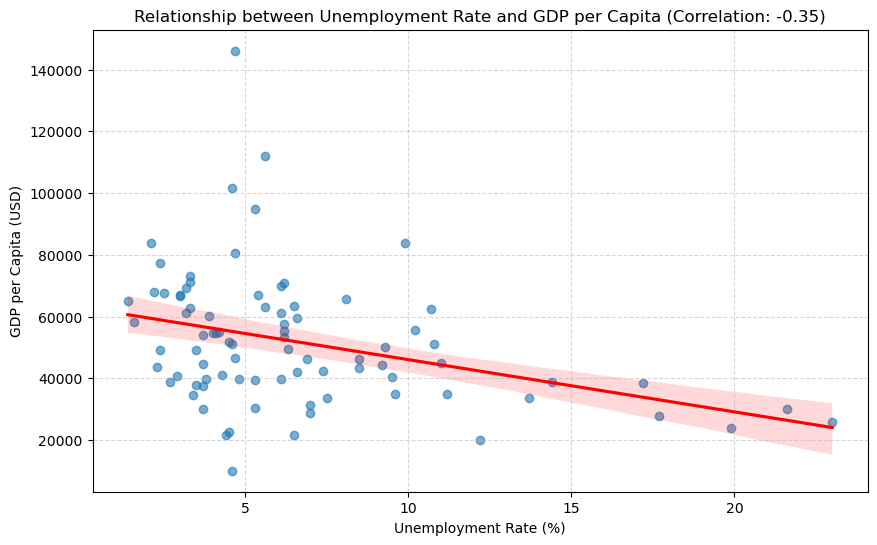

Correlation Coefficient (r): -0.35
Relationship Suggestion: This suggests a **negative correlation**. Generally, as the GDP per Capita (economic output) increases, the Unemployment Rate tends to decrease.


In [50]:
correlation = df['Unemployment Rate'].corr(df['GDP per Capita'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Unemployment Rate', y='GDP per Capita', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f'Relationship between Unemployment Rate and GDP per Capita (Correlation: {correlation:.2f})')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('GDP per Capita (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"Correlation Coefficient (r): {correlation:.2f}")

if correlation < 0:
    suggestion = "This suggests a **negative correlation**. Generally, as the GDP per Capita (economic output) increases, the Unemployment Rate tends to decrease."
elif correlation > 0:
    suggestion = "This suggests a **positive correlation**. This is an unexpected finding, meaning both GDP per Capita and Unemployment Rate tend to increase or decrease together."
else:
    suggestion = "This suggests **no strong linear correlation** between the two variables."
    
print(f"Relationship Suggestion: {suggestion}")

#### **4. b)**


---
Which are the top 5 cities with the largest difference between the Average 
Monthly Salary and Average Cost of Living?
What about the top 5 countries with the smallest average difference?
Show these results with meaningful visualizations.

In [51]:
df['Salary_vs_CostLiv_Diff'] = abs(df['Average Monthly Salary'] - df['Average Cost of Living'])

In [52]:
top_5_l = df.nlargest(5, 'Salary_vs_CostLiv_Diff')[['Country', 'Average Monthly Salary', 'Average Cost of Living', 'Salary_vs_CostLiv_Diff']
]

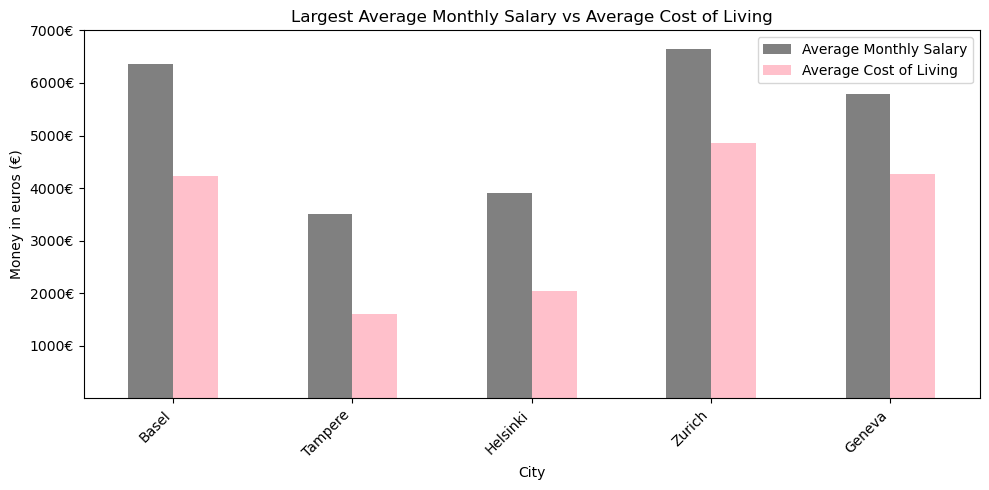

In [53]:
top_5_l[['Average Monthly Salary', 'Average Cost of Living']].plot.bar(figsize=(10,5),color=['gray', 'pink'])
plt.title('Largest Average Monthly Salary vs Average Cost of Living')
plt.ylabel('Money in euros (€)')
plt.xticks(rotation=45, ha='right')
plt.yticks([1000,2000,3000,4000,5000,6000,7000],
           ['1000€','2000€','3000€','4000€','5000€','6000€','7000€'])
plt.tight_layout()

plt.show()

In [54]:
country_avg = df.groupby('Country').agg({
    'Salary_vs_CostLiv_Diff': 'mean',
    'Average Monthly Salary': 'mean',
    'Average Cost of Living': 'mean'
}).sort_values(by='Salary_vs_CostLiv_Diff')

In [55]:
top_5 = country_avg.head(5)

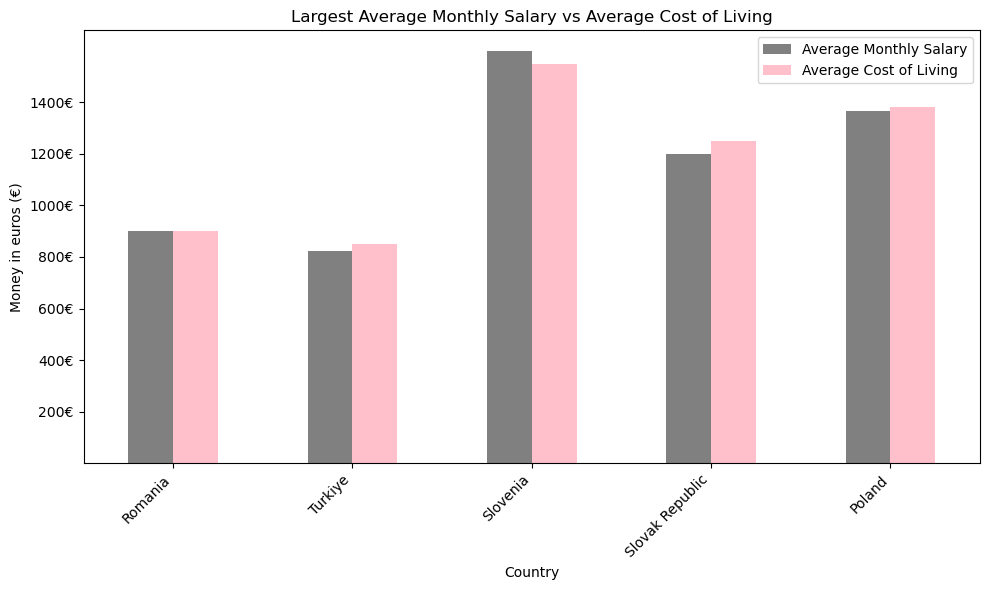

In [56]:
top_5[['Average Monthly Salary', 'Average Cost of Living']].plot.bar(
    figsize=(10,6), color=['gray', 'pink']
)

plt.title('Largest Average Monthly Salary vs Average Cost of Living')
plt.ylabel('Money in euros (€)')
plt.xticks(rotation=45, ha='right')
plt.yticks([200,400,600,800,1000,1200,1400],
           ['200€','400€','600€','800€','1000€','1200€','1400€'])
plt.tight_layout()
plt.show()

#### **4. c)**


---
Which is the best city for someone seeking: an average monthly salary above €1600, a cost of living below €900, and a country suitable for starting a family (with a relatively larger youth population)?


In [78]:
best_city_candidates = df[
    (df['Average Monthly Salary'] > 2000) &
    (df['Average Cost of Living'] <= 1600)
]

if not len(best_city_candidates)==0:
    best_city_by_unemployment = best_city_candidates.sort_values(by='Unemployment Rate').iloc[0]
    
    print(f"The best city for that criteria is: {best_city_by_unemployment.name}, {best_city_by_unemployment['Country']}")
else:
    print("Nenhuma cidade cumpre simultaneamente os critérios de Salário > €200 e Custo de Vida < €1600.")

The best city for that criteria is: Dresden, Germany


#### **5.**


---
What are three additional insights you find meaningful when comparing the given cities?

> Rent Burden

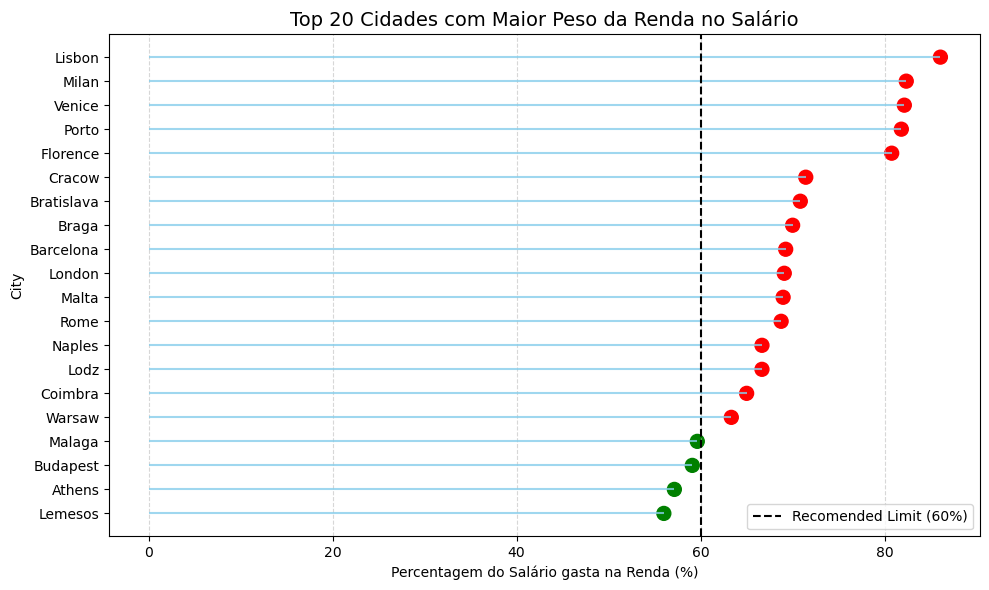

In [79]:
df['Rent_Burden'] = (df['Average Rent Price'] / df['Average Monthly Salary']) * 100
top_burden = df.nlargest(20, 'Rent_Burden').sort_values(by='Rent_Burden', ascending=True)

plt.figure(figsize=(10, 6))
plt.hlines(y=top_burden.index, xmin=0, xmax=top_burden['Rent_Burden'], color='skyblue', alpha=0.8)
colors = ['red' if x > 60 else 'green' for x in top_burden['Rent_Burden']]
plt.scatter(top_burden['Rent_Burden'], top_burden.index, color=colors, s=100, alpha=1)
plt.axvline(x=60, color='black', linestyle='--', label='Recomended Limit (60%)')
plt.title('Top 20 Cidades com Maior Peso da Renda no Salário', fontsize=14)
plt.xlabel('Percentagem do Salário gasta na Renda (%)')
plt.ylabel('City')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

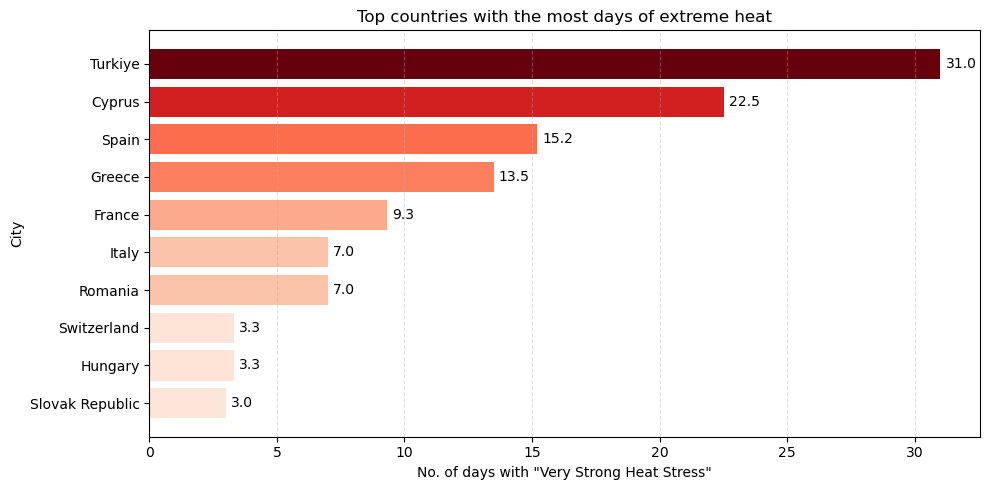

In [80]:
heat_stress = df.groupby('Country')['Days of very strong heat stress'].mean().sort_values()
heat_stress_top = heat_stress.tail(10)

plt.figure(figsize=(10, 5))
colors = plt.cm.Reds(heat_stress_top.values / heat_stress_top.max())
bars = plt.barh(heat_stress_top.index, heat_stress_top.values, color=colors)
plt.title('Top countries with the most days of extreme heat')
plt.xlabel('No. of days with "Very Strong Heat Stress"')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.4)

for bar in bars:
    width = round(bar.get_width(),1)
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, f'{width:}', va='center')

plt.tight_layout()
plt.show()

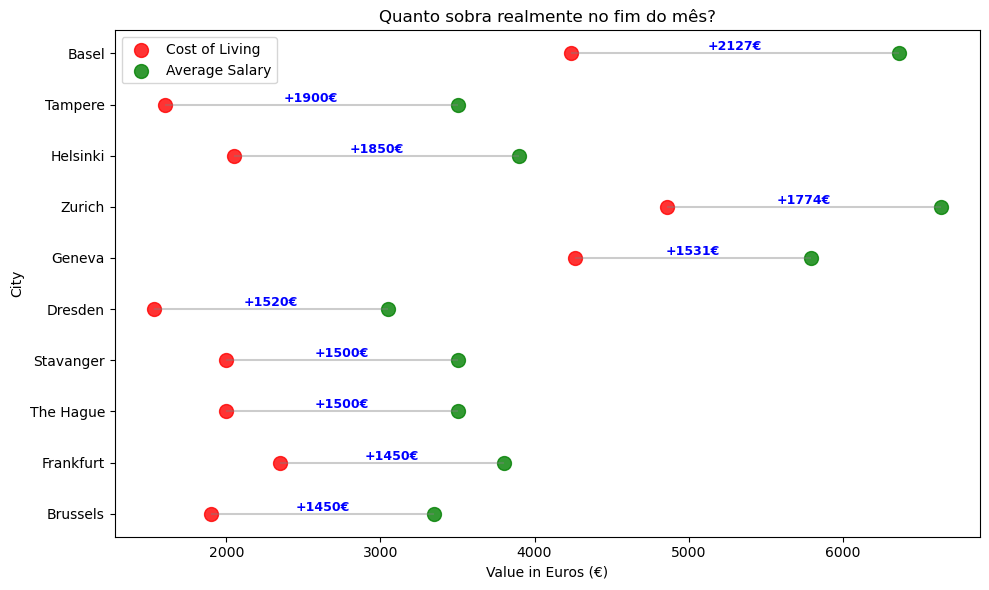

In [83]:
df['Disposable_Income'] = df['Average Monthly Salary'] - df['Average Cost of Living']
top_cities = df.nlargest(10, 'Disposable_Income').sort_values(by='Disposable_Income', ascending=True)

plt.figure(figsize=(10, 6))
plt.hlines(y=top_cities.index, xmin=top_cities['Average Cost of Living'], xmax=top_cities['Average Monthly Salary'], color='grey', alpha=0.4)
plt.scatter(top_cities['Average Cost of Living'], top_cities.index, color='red', label='Cost of Living', s=100, alpha=0.8)
plt.scatter(top_cities['Average Monthly Salary'], top_cities.index, color='green', label='Average Salary', s=100, alpha=0.8)

for i, (cost, salary) in enumerate(zip(top_cities['Average Cost of Living'], top_cities['Average Monthly Salary'])):
    diff = round(salary - cost, 0)
    plt.text((cost + salary)/2, i, f'+{diff:}€', va='bottom', ha='center', fontsize=9, color='blue', fontweight='bold')

plt.title('Quanto sobra realmente no fim do mês?')
plt.xlabel('Value in Euros (€)')
plt.ylabel('City')
plt.legend()
plt.tight_layout()
plt.show()

### <font color='#0EE071'>4. Advanced Topic - Building an Interactive Map </font> <a class="anchor" id="4"></a>
  [Back to TOC](#toc) 

#### **1. Web Scraping**


---

In [61]:
import requests
from bs4 import BeautifulSoup
import time
import re

def build_wikipedia_url(city):
    city = str(city)
    clean_city = city.replace(' ', '_')
    return f"https://en.wikipedia.org/wiki/{clean_city}"

def get_raw_string(city, country):
    url = build_wikipedia_url(city)
    headers = {'User-Agent': 'Mozilla/5.0'}
    
    response = requests.get(url, headers=headers, timeout=10)
    soup = BeautifulSoup(response.text, "html.parser")
    geo_tag = soup.find("span", {"class": "geo"})
    if geo_tag:
        return geo_tag.text
        
    return None

raw_data_list = []

for index, row in df.iterrows():
    city_name = index
    country_name = row['Country']
    city_url = build_wikipedia_url(city_name)
    
    raw_text = get_raw_string(city_name, country_name)
    raw_data_list.append(raw_text)
    
    if not raw_text:
        print(f"Could not find coordinates for {city_name}: {city_url}")
        
    time.sleep(0.5)

df['Raw_Coordinates'] = raw_data_list

Could not find coordinates for Gent: https://en.wikipedia.org/wiki/Gent
Could not find coordinates for Split: https://en.wikipedia.org/wiki/Split
Could not find coordinates for Cork: https://en.wikipedia.org/wiki/Cork


In [62]:
def fix_specific_cities(df):
    wiki_fix = {"Gent": "Ghent","Cork": "Cork_(city)","Split": "Split,_Croatia"}
    headers = {'User-Agent': 'Mozilla/5.0'}

    for city_name, wiki_suffix in wiki_fix.items():
        url = f"https://en.wikipedia.org/wiki/{wiki_suffix}"
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        geo_tag = soup.find("span", {"class": "geo"})
        if geo_tag:
            raw_coord = geo_tag.text
            df.loc[city_name, 'Raw_Coordinates'] = raw_coord
            print(f"{city_name} updated: '{raw_coord}'")
        else:
            print(f"Could not find coordinates for {city_name}")

fix_specific_cities(df)

Gent updated: '51.05361; 3.72528'
Cork updated: '51.89722; -8.47000'
Split updated: '43.51000; 16.44000'


In [63]:
temp_coords = df['Raw_Coordinates'].str.split(';', expand=True)
df['Latitude'] = temp_coords[0].str.strip().astype(float)
df['Longitude'] = temp_coords[1].str.strip().astype(float)
df.drop(columns=['Raw_Coordinates'], inplace=True)

#### **2. Interactive Map**


---

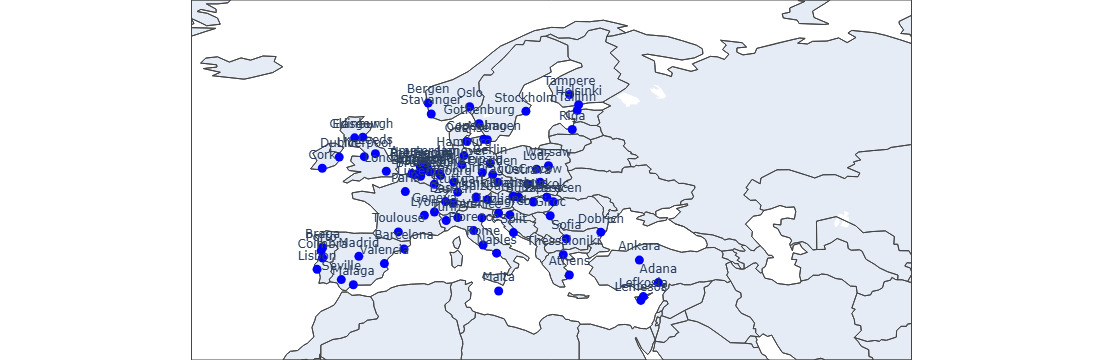

In [86]:
import plotly.express as px

df_map = df.reset_index()

df_map['hover_text'] = (
    df_map['City'] +
    '<br>Country=' + df_map['Country'] +
    '<br>Population=' + df_map['Population'].astype(str) +
    '<br>Average Monthly Salary=' + df_map['Average Monthly Salary'].astype(str) +
    '<br>Average Cost of Living=' + df_map['Average Cost of Living'].astype(str)
)

fig = px.scatter_geo(
    df_map,
    lat='Latitude',
    lon='Longitude',
    text='City',
    hover_name='City',
    hover_data={
        'City': False,
        'Country': True,
        'Population': True,
        'Average Monthly Salary': True,
        'Average Cost of Living': True,
        'Latitude': False,
        'Longitude': False
    },
    scope='world'
)

fig.update_traces(
    marker=dict(size=9, color='blue'),
    textposition='top center'
)
fig.update_layout(
    geo=dict(
        projection_scale=5,
        center=dict(lat=48, lon=15),
        showcountries=True
    ),
    margin=dict(l=0, r=0, t=0, b=0),
    height=600
)

fig.show()

### <font color='#BFD72F'>5. Data Science In Action </font> <a class="anchor" id="5"></a>
  [Back to TOC](#toc) 

| Variable                | Description                                                                                                                                                                                                 |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Health Care Index** | Estimates the overall quality of a healthcare system by evaluating key factors such as medical professionals, equipment, staff, doctors, and costs. It provides an assessment of the healthcare infrastructure, services, and resources available in a specific location. |
| **Crime Index**       | Estimates the overall level of crime in a city or country. It is categorized as follows: Very Low (<20), Low (20-40), Moderate (40-60), High (60-80), Very High (>80).                                                                          |
| **Traffic Index**     | Composite measure that considers factors such as commute time, dissatisfaction with time spent in traffic, CO2 emissions, and overall traffic system inefficiencies. It provides insights into the overall traffic conditions in a city.          |
